# Metin Sınıflandırma


In [1]:
import pandas as pd
import on_islem


In [2]:
df = pd.read_csv("data/metin_siniflandirma-230518-122016.csv",index_col=0)
df["Text_2"]=df["Text"].apply(on_islem.pre_processing)
df ["Text_2"] = df ["Text_2"].apply(on_islem. remove_space) 
df ["Text_3"] = [' '.join(wrd for wrd in x) for x in df["Text_2"]]



df_index = df [df ["Text_2"].str[0].isnull()].index
df = df.drop(df_index)
df = df.reset_index()
del df ["index"]
df.head()

,Text,Label,Text_2,Text_3
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın,"[allah, çıldıracağım, ye, eder, çıldıracak, si...",allah çıldıracağım ye eder çıldıracak sinirimd...
1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın,"[si, zama, çalıştı, ür, stok, bit, diyor, mal,...",si zama çalıştı ür stok bit diyor mal mı oğl k...
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın,"[sebep, di, bağıracak, ş, kal]",sebep di bağıracak ş kal
3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın,"[black, friday, amk, yıl, çıkar, boku, mal, mı...",black friday amk yıl çıkar boku mal mı nesiniz
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın,"[kıs, kıs, cevap, vericek, ni, yazıyor, gerize...",kıs kıs cevap vericek ni yazıyor gerizekal


In [3]:
df.groupby("Label").size()


Label
korku      800
kızgın     799
mutlu      800
surpriz    800
üzgün      799
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split


In [5]:
msg_train,msg_test, label_train, label_test=train_test_split(df["Text_3"].tolist(),df ["Label"].tolist(), test_size=0.2, random_state=42)

In [6]:
len (msg_train)



3198

In [7]:
len(msg_test)



800

In [8]:
len (label_train)





3198

In [9]:
df_test = pd.DataFrame({"text": msg_test, 'label' : label_test}) 
df_test.groupby("label").size()

label
korku      164
kızgın     169
mutlu      160
surpriz    155
üzgün      152
dtype: int64

In [10]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


In [11]:
svm = Pipeline([('vect', TfidfVectorizer()), ('svm', LinearSVC())])


In [12]:
svm.fit(msg_train, label_train)
y_pred_class = svm.predict(msg_test)

In [13]:
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,ConfusionMatrixDisplay


In [14]:
print("svm accuracy score", accuracy_score (label_test, y_pred_class))

svm accuracy score 0.97875


In [15]:
print("svm f1 score :",f1_score(label_test,y_pred_class,average="weighted"))

svm f1 score : 0.9787445055608519


In [16]:
len(label_test)

800

In [17]:
df_test.groupby("label").size()


label
korku      164
kızgın     169
mutlu      160
surpriz    155
üzgün      152
dtype: int64

In [18]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


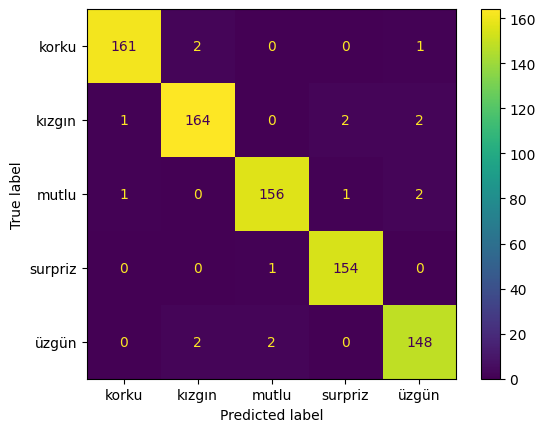

In [19]:
cm=confusion_matrix(label_test,y_pred_class, labels=svm.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_) 
disp.plot();

In [20]:
# örnek veri testi 

msg_test_2=["Ben iyiyim"]
y_pred_class=svm.predict(msg_test_2)
y_pred_class

array(['korku'], dtype='<U7')

In [21]:
from gensim.models import Word2Vec

model=Word2Vec.load("data/word2vec.model")
model.build_vocab(df["Text_2"].tolist(),update=True)
model.save("data/word2vec.model")

In [22]:
model

In [23]:
df["word2vec"]=df["Text_2"].apply(on_islem.word2vec)
df.head()

,Text,Label,Text_2,Text_3,word2vec
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın,"[allah, çıldıracağım, ye, eder, çıldıracak, si...",allah çıldıracağım ye eder çıldıracak sinirimd...,"[-0.00038604516885243356, 0.010611681267619133..."
1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın,"[si, zama, çalıştı, ür, stok, bit, diyor, mal,...",si zama çalıştı ür stok bit diyor mal mı oğl k...,"[-0.0016249950276687741, 0.004682305734604597,..."
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın,"[sebep, di, bağıracak, ş, kal]",sebep di bağıracak ş kal,"[-0.0026200436986982822, 0.004791211802512407,..."
3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın,"[black, friday, amk, yıl, çıkar, boku, mal, mı...",black friday amk yıl çıkar boku mal mı nesiniz,"[0.0005672110710293055, 0.007861573249101639, ..."
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın,"[kıs, kıs, cevap, vericek, ni, yazıyor, gerize...",kıs kıs cevap vericek ni yazıyor gerizekal,"[0.0013752399245277047, 0.0022527524270117283,..."


In [24]:
msg_train, msg_test, label_train, label_test = train_test_split(df["word2vec"].tolist(),df ["Label"].tolist(), test_size=0.2, random_state=42) 
svm=Pipeline([('svm', LinearSVC())]) 
svm.fit(msg_train, label_train)
y_pred_class = svm.predict(msg_test)
print("svm accuracy score :", accuracy_score (label_test,y_pred_class))
print("svm f1 score",f1_score (label_test, y_pred_class, average="weighted"))

svm accuracy score : 0.40875
svm f1 score 0.3981842671115791


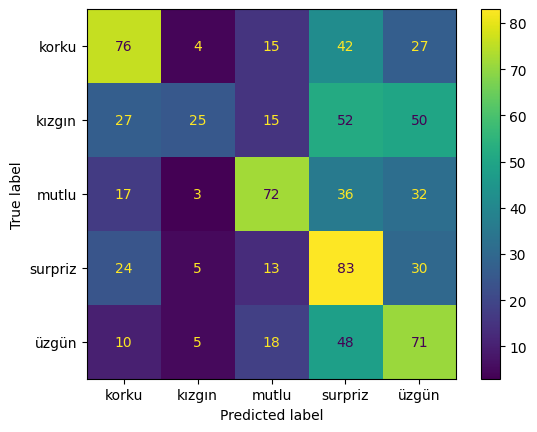

In [25]:
cm=confusion_matrix(label_test,y_pred_class, labels=svm.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_) 
disp.plot();

In [26]:
from sklearn.neighbors import KNeighborsClassifier


msg_train, msg_test, label_train, label_test=train_test_split(df["Text_3"].tolist(), df ["Label"].tolist(), test_size=0.2, random_state=42) 
knn= Pipeline ([('vect', TfidfVectorizer()), ('knn',KNeighborsClassifier())]) 
knn.fit(msg_train, label_train)
y_pred_class = knn.predict(msg_test)



print("knn accuracy score:", accuracy_score (label_test, y_pred_class))
print("knn f1 score:", f1_score (label_test, y_pred_class, average="weighted"))

knn accuracy score: 0.79625
knn f1 score: 0.7962817075576796


In [27]:
len(msg_test)

800

In [28]:
800*0.79

632.0

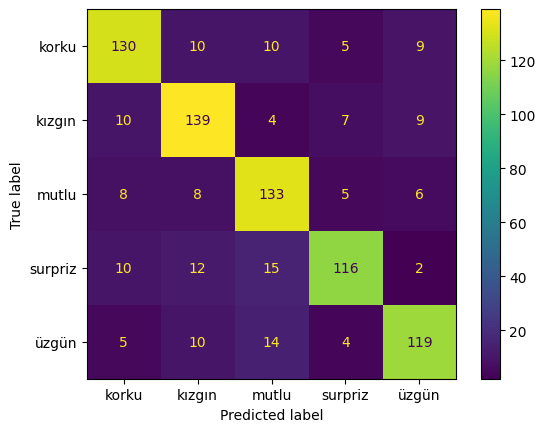

In [29]:
cm=confusion_matrix(label_test,y_pred_class, labels=svm.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_) 
disp.plot();

In [30]:
from sklearn.neighbors import KNeighborsClassifier

msg_train, msg_test, label_train, label_test=train_test_split(df ["word2vec"].tolist(), df ["Label"].tolist(), test_size=0.2, random_state=42) 
knn =Pipeline([('knn', KNeighborsClassifier())])
knn.fit(msg_train, label_train)
y_pred_class = knn.predict(msg_test)

print("knn accuracy score", accuracy_score (label_test, y_pred_class))
print("knn f1 score", f1_score (label_test, y_pred_class, average="weighted"))

knn accuracy score 0.335
knn f1 score 0.32370967651357757
